In [1]:
import torch
from lerobot.datasets.lerobot_dataset import LeRobotDataset

dataset_name = "HuggingFaceVLA/libero"

dataset = LeRobotDataset(dataset_name)
q01 = dataset.meta.stats['action']['q01']
q99 = dataset.meta.stats['action']['q99']

print("q01, q99", q01, q99, type(q01))

class ActionNormalization:
    def __init__(self, lower_bound: torch.Tensor, upper_bound: torch.Tensor):
        assert lower_bound.le(upper_bound).all(), "elements of lower_bound are larger than their counterparts in upper_bound"
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.dynamic_range = self.upper_bound - self.lower_bound + 1e-8

    def normalize(self, actions: torch.Tensor) -> torch.Tensor:
        actions = torch.clamp(actions, self.lower_bound, self.upper_bound)
        return 2 * (actions - self.lower_bound) / self.dynamic_range - 1
    
    def unnormalize(self, normalized_actions: torch.Tensor) -> torch.Tensor:
        return (normalized_actions + 1) * 0.5 * self.dynamic_range + self.lower_bound


action_normalization = ActionNormalization(torch.from_numpy(q01), torch.from_numpy(q99))

sample = dataset[0]

action = sample['action']
normalized = action_normalization.normalize(sample['action'])
unnormalize = action_normalization.unnormalize(normalized)

print('original', action)

print('normalized', normalized)
print('unnormalized', unnormalize)


/home/koepf/miniconda3/envs/vltest/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


q01, q99 [-0.53519956 -0.60389401 -0.77835272 -0.074094   -0.11625245 -0.12600179
 -1.        ] [0.70946436 0.73206479 0.80147542 0.08395455 0.13927571 0.10880501
 0.91947699] <class 'numpy.ndarray'>
original tensor([ 0.0161,  0.0000, -0.0000,  0.0000,  0.0000, -0.0000, -1.0000])
normalized tensor([-0.1142, -0.0959, -0.0146, -0.0624, -0.0901,  0.0732, -1.0000],
       dtype=torch.float64)
unnormalized tensor([ 0.0161,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
       dtype=torch.float64)


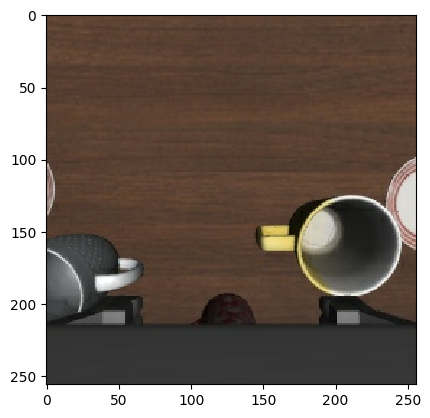

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

show(sample["observation.images.image2"])